Uploading Data

In [9]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
data_dir = 'C:/Users/ilke/Documents/GitHub/Vehiclator/dataset'

In [11]:
img_size = (224, 224)
batch_size = 32

In [12]:
datagen = ImageDataGenerator(
    validation_split=0.2,  # %80 training, %20 validation
    rescale=1./255          # normalization of pixels: from 0-255 pixel to 0-1 pixel
)

In [13]:
#training function
train_data = datagen.flow_from_directory( #reads from directories (land, air, sea)
    data_dir,
    target_size=img_size, #resize pictures
    batch_size=batch_size,
    class_mode='sparse', #gives labels as integers (0,1,2) for our dataset
    subset='training', #this data is for training indicates
    shuffle=True #reads pictures after shuffling for better training
)

Found 20441 images belonging to 3 classes.


This is a data pipeline. As the training goes, model takes inputs as batch from train_data. For each batch:
X = image
Y = Label (0, 1, 2)

In [14]:
#testing function
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)

Found 5109 images belonging to 3 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    # Conv Block 1
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Conv Block 2
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Conv Block 3
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # overfitting'i azaltmak için
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])


Defining how model will learn:

In [16]:
model.compile(
    optimizer='adam', #Adaptive Moment Estimation (ADAM) as algorithm
    loss='sparse_categorical_crossentropy', #loss function, sparse because discrete classes as input 0, 1, 2
    metrics=['accuracy'] #performance metric
)

Start Training:

In [17]:
history = model.fit( #history to hold loss value, accur
    train_data, #data we are using for training
    validation_data=val_data, #validate how well the model is
    epochs=4 #Model traverses dataset from the beginning for 4 times
)

C:\Users\ilke\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
639/639 ━━━━━━━━━━━━━━━━━━━━ 1782s 3s/step - accuracy: 0.9001 - loss: 2.6980 - val_accuracy: 0.9350 - val_loss: 0.3952
Epoch 2/4
639/639 ━━━━━━━━━━━━━━━━━━━━ 1877s 3s/step - accuracy: 0.9616 - loss: 0.3213 - val_accuracy: 0.9890 - val_loss: 0.0670
Epoch 3/4
639/639 ━━━━━━━━━━━━━━━━━━━━ 1692s 3s/step - accuracy: 0.9821 - loss: 0.0997 - val_accuracy: 0.9824 - val_loss: 0.1988
Epoch 4/4
639/639 ━━━━━━━━━━━━━━━━━━━━ 1733s 3s/step - accuracy: 0.9828 - loss: 0.0812 - val_accuracy: 0.9791 - val_loss: 0.0843


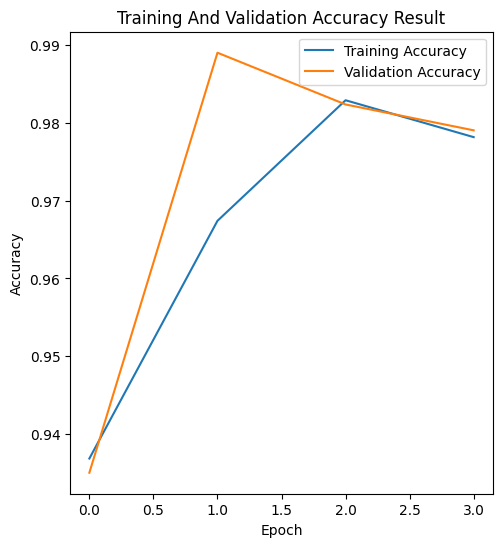

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training And Validation Accuracy Result')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


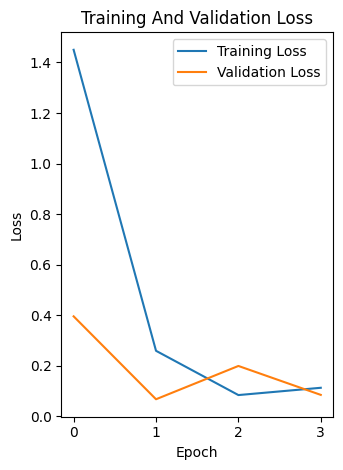

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training And Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Testing The Model:

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the directory for the test data
test_data_dir = 'C:/Users/ilke/Documents/GitHub/Vehiclator/test_images'

# Create ImageDataGenerator to load and preprocess test images
datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values


test_data = datagen.flow_from_directory(
    test_data_dir,  
    target_size=(224, 224),  
    batch_size=32,  
    class_mode='sparse',  #Labels are integers (0 for land, 1 for air, 2 for sea)
    shuffle=False  # Do not shuffle data to keep the order of labels
)


Found 21985 images belonging to 3 classes.


In [22]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

688/688 ━━━━━━━━━━━━━━━━━━━━ 367s 533ms/step - accuracy: 0.9797 - loss: 1.7257
Test Loss: 0.9793375730514526
Test Accuracy: 0.9722537994384766


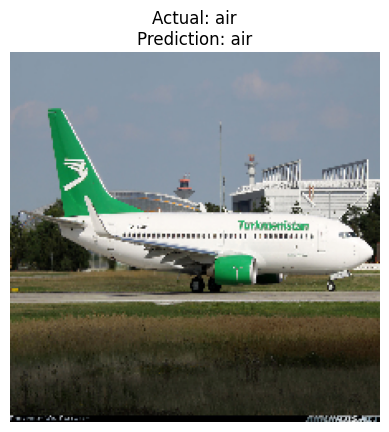

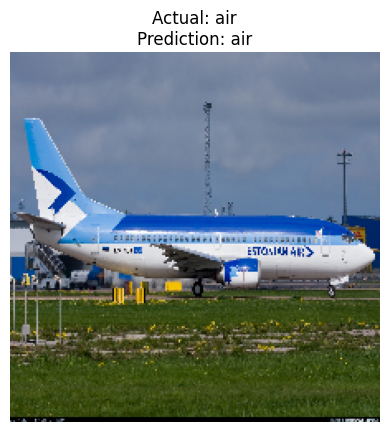

In [39]:
import numpy as np
import matplotlib.pyplot as plt

test_data.reset()
class_names = [k for k, v in sorted(test_data.class_indices.items(), key=lambda item: item[1])]

correct_count = 0  

for batch in test_data:
    images, labels = batch[0], batch[1]
    preds = model.predict(images, verbose=0)  
    
    for i in range(len(images)):
        actual = int(labels[i])
        predicted = np.argmax(preds[i])
        
        if actual == predicted:  
            plt.imshow(images[i])
            plt.title(f"Actual: {class_names[actual]}\nPrediction: {class_names[predicted]}")
            plt.axis('off')
            plt.show()
            
            correct_count += 1  
            
            if correct_count >= 2:  
                break  
    
    if correct_count >= 2:
        break


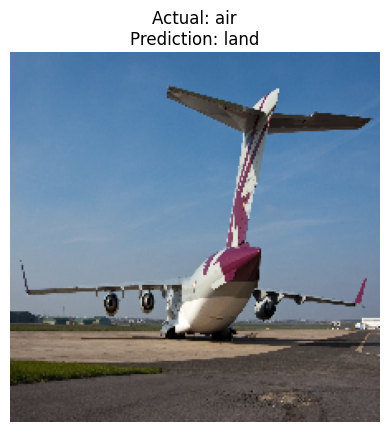

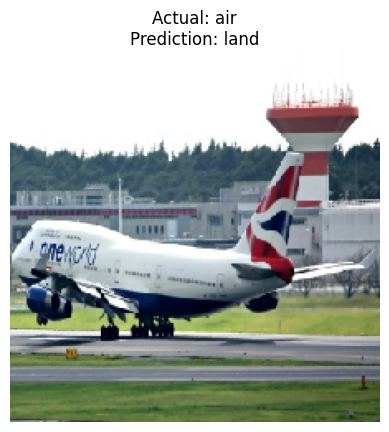

In [38]:
import numpy as np
import matplotlib.pyplot as plt

test_data.reset()
class_names = [k for k, v in sorted(test_data.class_indices.items(), key=lambda item: item[1])]

incorrect_count = 0  

for batch in test_data:
    images, labels = batch[0], batch[1]
    preds = model.predict(images, verbose=0)  
    
    for i in range(len(images)):
        actual = int(labels[i])
        predicted = np.argmax(preds[i])
        
        if actual != predicted:
            
            plt.imshow(images[i])
            plt.title(f"Actual: {class_names[actual]}\nPrediction: {class_names[predicted]}")
            plt.axis('off')
            plt.show()
            
            incorrect_count += 1  
            
            if incorrect_count >= 2:  
                break  
    
    if incorrect_count >= 2:
        break  


In [4]:
model.save('model_V2.h5')